# About the project
This notebook was developed as a solution for a common problem on companies: Employee Turnover. The objective of this project is to develop an IA (artifitial intelligence) to predict employee turnover, helping managers take action to prevent it, reducing costs for the company and preventing intelectual capital loss. </br>

# Important information about the project:#
- The dataset was divided into training and testing parts in the ratio 80:20, that means 80% of the database will be used for training and 20% for testing.
- Preprocessing was required because the dataset contains redundant information such as "EmployeeCount", "Over18" and "StandardHours". There was not any null data on the dataset.
- Results were evaluated using the coefficient of determination and the mean error.

<p>Dataset: Employee Attrition: https://www.kaggle.com/datasets/patelprashant/employee-attrition?datasetId=12204&sortBy=voteCount  </p>



## Notebook Configs

### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Modifying chart parameters to better visualize the data


In [ ]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 1. Frame The Problem

An important aspect of the business environment is staff turnover, as it is necessary for companies to hire new employees in order to maintain teams with diverse ideas and thoughts, as well as to turn off employees who have become incompatible with the company's environment, disqualified over time, or simply too expensive. </br>
Despite the fact that the company has control over who it hires, how it hires, and when it hires, either employees or the company may initiate a layoff. As a result, it is in the company's interest to be able to predict and even prevent the dismissal of an employee in order to minimize the turnover of personnel. </br>
While there are some clues when an employee is about to resign, what will be addressed is the wear and tear of employees, which is the decline in their relationship with the organization. Various factors may contribute to this phenomenon, including poor working conditions, changes in corporate culture, or the modernization of the workforce. To remain competitive, modern, motivated, and diversified, an organization should pay close attention to the wear and tear of its employees. <br/>
The objective of this project is to develop an AI for use in business scenarios in order to detect and possibly prevent dismissals of employees, thus reducing the costs for the company and preventing the loss of intellectual capital.


## 2. Get the Data

### Importing the dataset:
Some values are of object type and need to be treated

In [ ]:
df = pd.read_csv('/content/sample_data/Employee-Attrition.csv',sep=',',decimal=',') 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 3.  Explore the data

<h4> The dataset is composed of the attributes:</h4>

* Age: How old the collaborator was when the data set was collected.
* Attrition: If the collaborator was suffering Attrition when the data set was collected.
* BusinessTravel: How frequently the collaborator traveled when the data set was collected.
* Daily Rate: How much money the collaborator receives working in the company in a day when the data set was collected.
* Department: In which department the collaborator belonged when the data set was collected.
* Distance from Home: How much the collaborator traveled from their home to the workplace when the data set was collected.
* Education: The level of education of the collaborator when the data set was collected.
* EducationField: In which field the collaborator graduaded from when the data set was collected.
* EmployeeCount: It is always 1 (one). Don't ask me why.
* EmployeeNumber: The identification number of the collaborator when the data set was collected.
* EnvironmentSatisfaction: How the collaborator evaluates their satisfaction with their business enviroment when the data set was collected.
* Gender: The gender of the collaborator (Male or Female).
* HourlyRate: How much the collaborator is payed working a hour when the data set was collected.
* JobInvolvement: What level the collaborator is involved with their job when the data set was collected.
* JobLevel: A grade classification informing the level of responsability of the collaborator when the data set was collected.
* JobRole: What role the collaborator playied in the company when the data set was collected.
* MaritalStatus: What marital status the collaborator is when the data set was collected.
* MonthlyIncome: How much the collaborator receives as income in a month when the data set was collected.
* NumCompaniesWorked: How many companies the collaborator worked in the past when the data set was collected.
* Over18: Informs if the collaborator is or is not over 18 years old when the data set was collected.
* OverTime: Informs if the collaborator works overtime when the data set was collected.
* PercentSalaryHike: How much the collaborator received in the their last salary hike percentage wise when the data set was collected.
* PerformanceRating: A grade classification informing the collaborator'performace when the data set was collected.
* RelationshipSatisfaction: How the collaborator evaluates their satisfaction with their relationship with the company when the data set was collected.
* StandardHours: How many hours collaborator works in the company in a standard week when the data set was collected.
* StockOptionLevel: How many hours collaborator works in the company in a standard week when the data set was collected.
* TotalworkingYears: How many years the collaborator worked in their lifetime when the data set was collected.
* TrainingTimesLastYear:  How many time the collaborator trained in the company last year when the data set was collected.
* WorkLifeBalance:  How the collaborator evaluates their work life balance with the company when the data set was collected.
* YearsAtCompany:  How many years the collaborator worked in the company when the data set was collected.
* YearsInCurrentRole:  How many years the collaborator worked in their current role in the company when the data set was collected.
* YearsSinceLastPromotion:  How many years the collaborator did not receive a promotion in the company when the data set was collected.
* YearsWithCurrManager:  How many years the collaborator worked with the current manager in the company when the data set was collected.



In [ ]:
print(f'This dataset contais {df.shape[0]} rows of data and {df.shape[1]} columns or attributes')

df.describe()

This dataset contais 1470 rows of data and 35 columns or attributes


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Falar das estatisticas
***
<h4>Through the simplest statistics of the dataframe, it is possible to visualize that the minimum temperature at which customers drink beer is 10.6º, with this, a brewery knows that the sale of beer will only occur on days with a minimum temperature greater than or equal to 10.6º and can, for example, close the store on that day, saving on employees.</h4>
<h4>It can be noted that there is a relationship between temperature and precipitation, that is, on hotter and drier days, there is a rise in consumption of beer.</h4>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

As seen with the database information, there are not lines with the value NaN

In [ ]:
print(np.sum(df.EmployeeCount)) #The EmployeeCount is always 1, so it is irrelevant to the ML

1470


In [ ]:
df.duplicated().any()

False

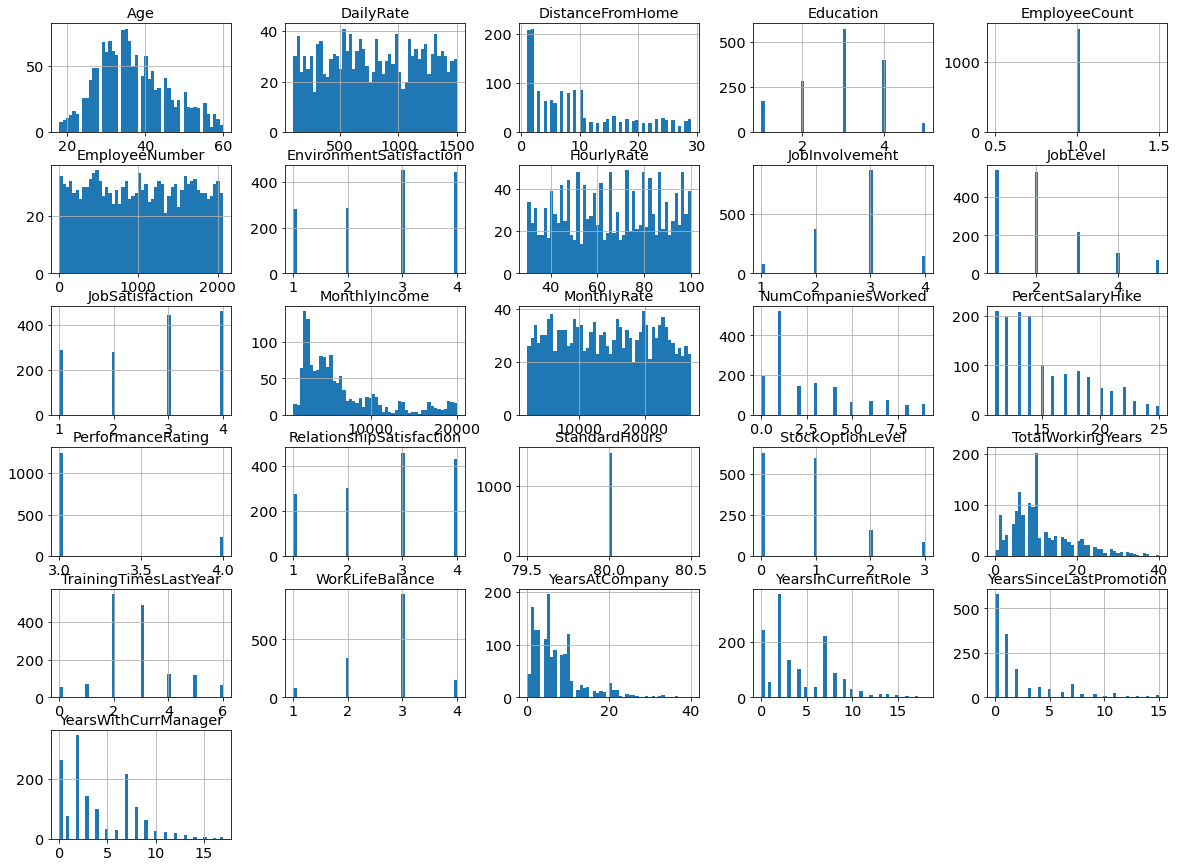

In [ ]:
# plot a histogram for each numeric attibute from the dataframe
df.hist(bins=50, figsize=(20,15))
display()  # just to avoid texts in the notebook output

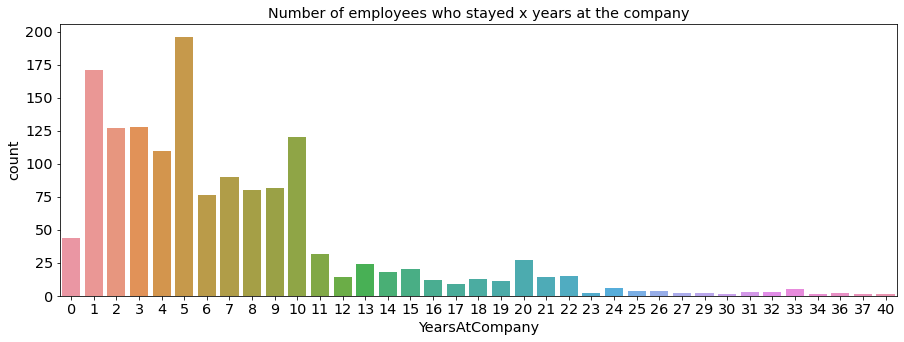

In [ ]:
plot = sns.countplot(data=df, x= 'YearsAtCompany').set(title='Number of employees who stayed x years at the company')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


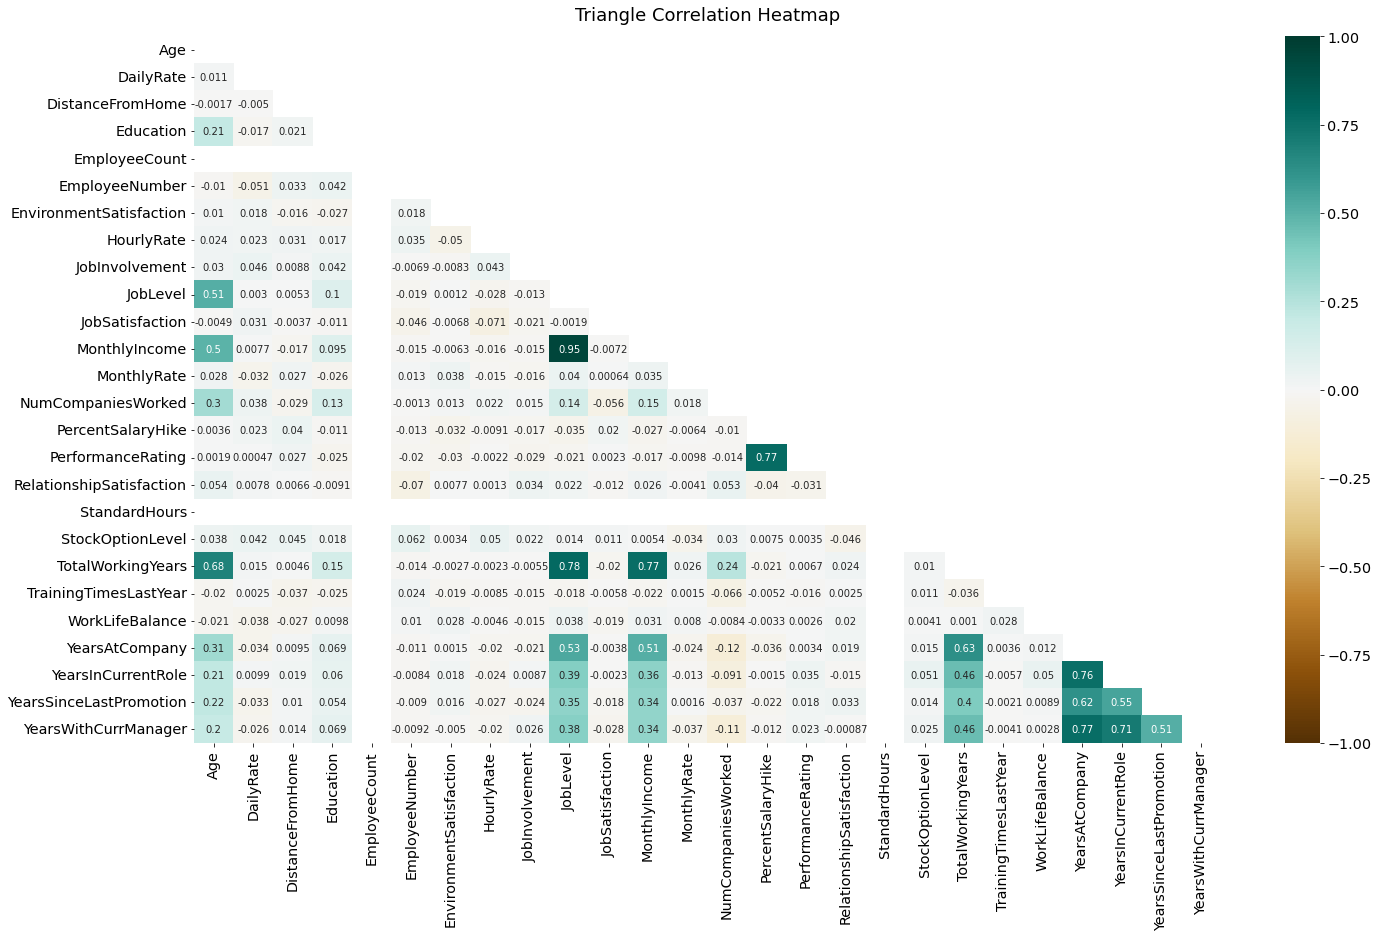

In [ ]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(23, 13))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## 4. Data Cleaning

In [ ]:
df = df.drop("Over18", axis='columns')
df = df.drop("EmployeeCount", axis='columns')
df = df.drop("StandardHours", axis='columns')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


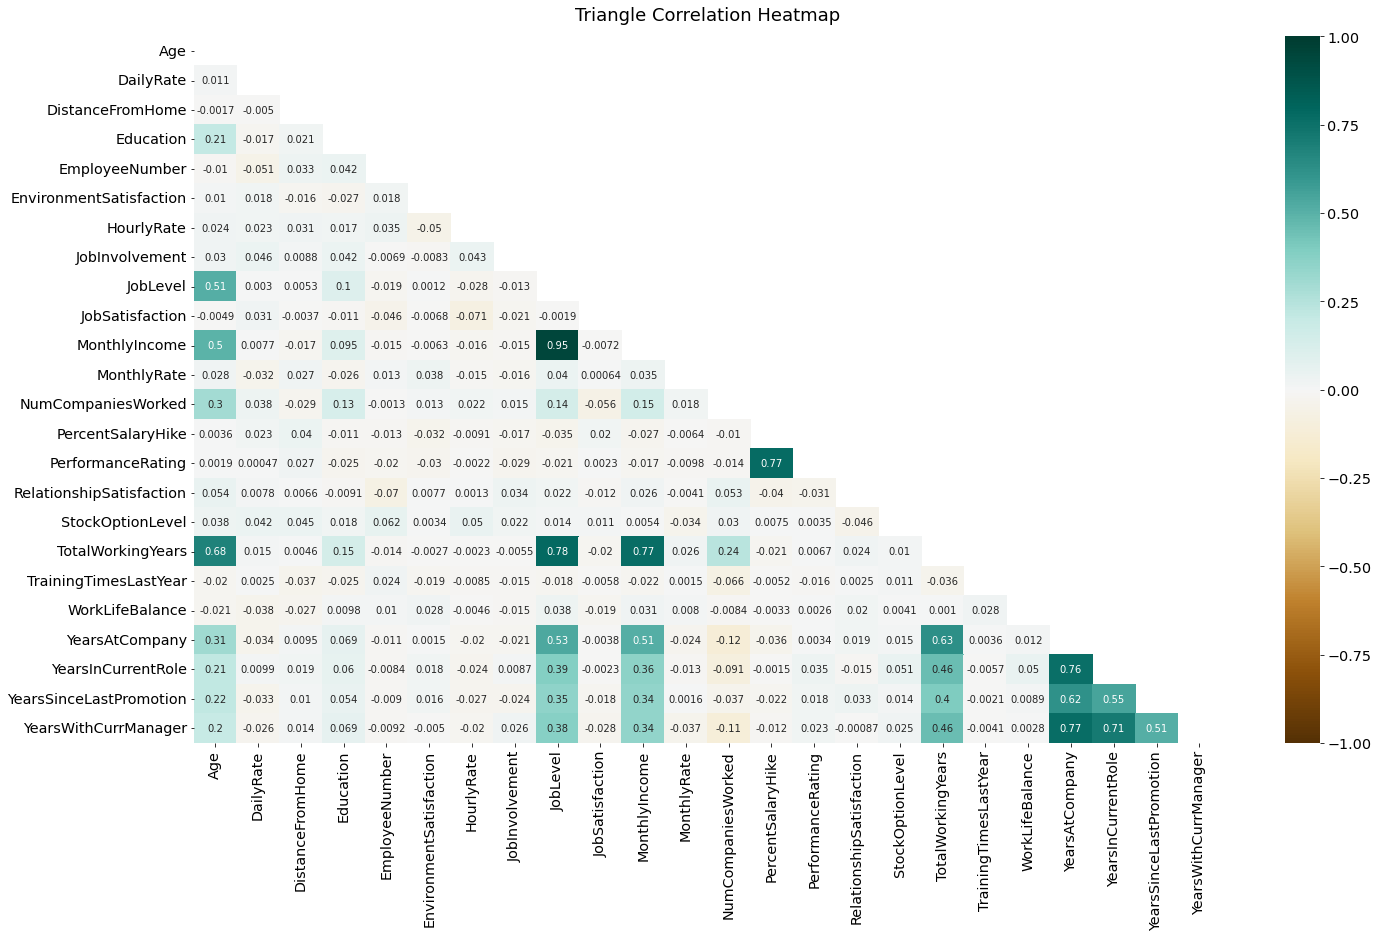

In [ ]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(23, 13))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## 5. Prepare the data (Preprocessing)

Identify the number of emproyees that suffer attrition in the data set

In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
df_new = df
df_new['Attrition'] = df_new['Attrition'].replace({'No':0,'Yes':1})
df_new = pd.get_dummies(data=df_new, columns=['Education'])
df_new = pd.get_dummies(data=df_new, columns=['EnvironmentSatisfaction'])
df_new = pd.get_dummies(data=df_new, columns=['JobInvolvement'])
df_new = pd.get_dummies(data=df_new, columns=['JobSatisfaction'])
df_new = pd.get_dummies(data=df_new, columns=['PerformanceRating'])
df_new = pd.get_dummies(data=df_new, columns=['RelationshipSatisfaction'])
df_new = pd.get_dummies(data=df_new, columns=['WorkLifeBalance'])
df_new = pd.get_dummies(data=df_new, columns=['BusinessTravel'])
df_new = pd.get_dummies(data=df_new, columns=['Department'])
df_new = pd.get_dummies(data=df_new, columns=['EducationField'])
df_new = pd.get_dummies(data=df_new, columns=['Gender'])
df_new = pd.get_dummies(data=df_new, columns=['JobLevel'])
df_new = pd.get_dummies(data=df_new, columns=['JobRole'])
df_new = pd.get_dummies(data=df_new, columns=['MaritalStatus'])
df_new = pd.get_dummies(data=df_new, columns=['OverTime'])
df_new = pd.get_dummies(data=df_new, columns=['StockOptionLevel'])
df_new.head()


,Age,Attrition,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,41,1,1102,1,1,94,5993,19479,8,11,...,0,0,0,1,0,1,1,0,0,0
1,49,0,279,8,2,61,5130,24907,1,23,...,0,0,1,0,1,0,0,1,0,0
2,37,1,1373,2,4,92,2090,2396,6,15,...,0,0,0,1,0,1,1,0,0,0
3,33,0,1392,3,5,56,2909,23159,1,11,...,0,0,1,0,0,1,1,0,0,0
4,27,0,591,2,7,40,3468,16632,9,12,...,0,0,1,0,1,0,0,1,0,0


Plotting the correlation graph to identify the variables most strongly correlated with the attrition

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


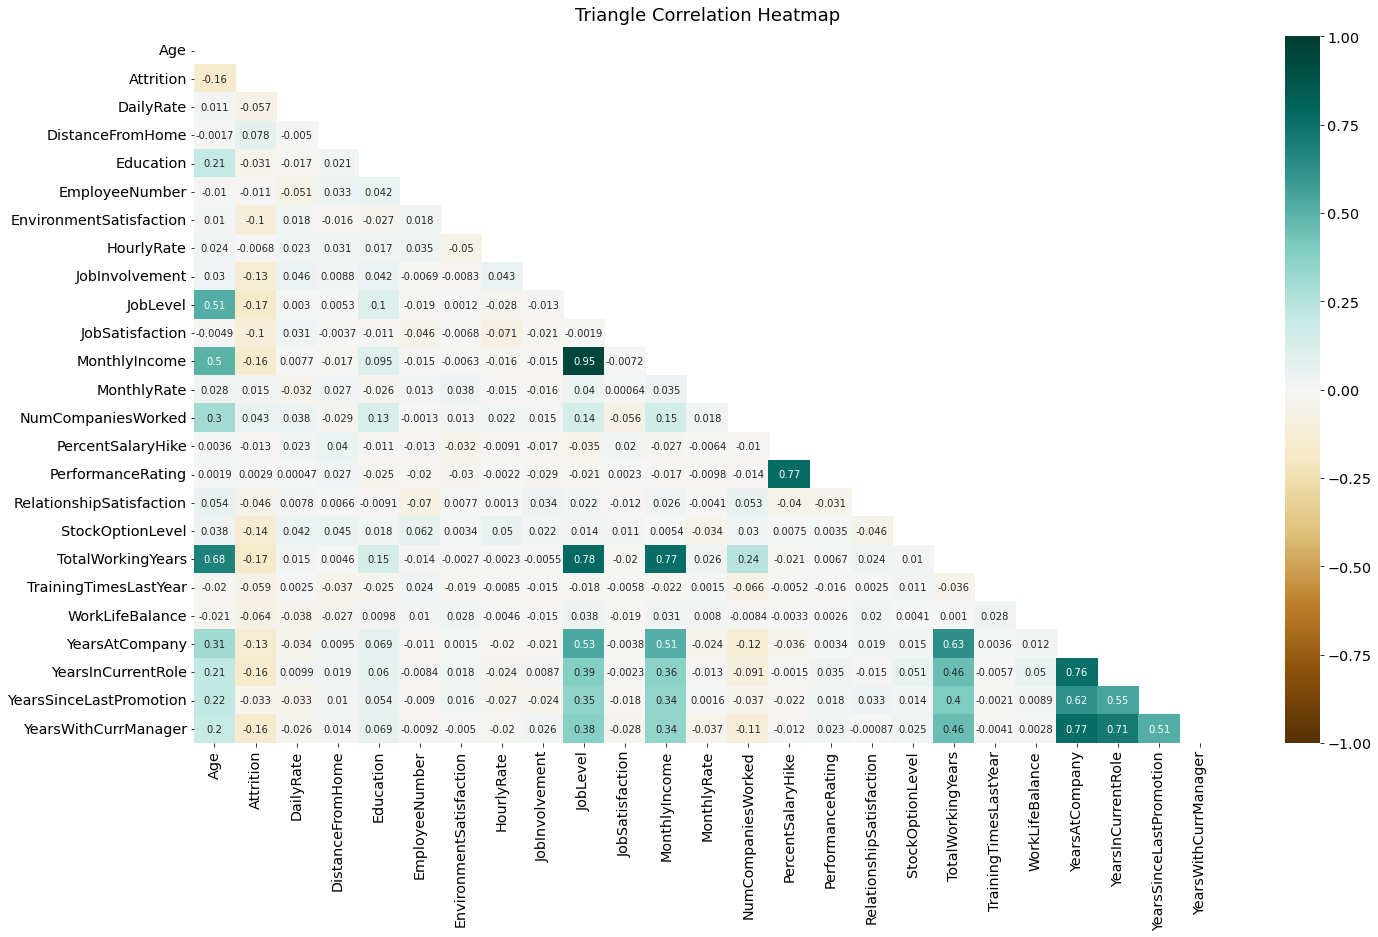

In [ ]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(23, 13))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
df_new.head()

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,41,1,1102,1,1,94,5993,19479,8,11,...,0,0,0,1,0,1,1,0,0,0
1,49,0,279,8,2,61,5130,24907,1,23,...,0,0,1,0,1,0,0,1,0,0
2,37,1,1373,2,4,92,2090,2396,6,15,...,0,0,0,1,0,1,1,0,0,0
3,33,0,1392,3,5,56,2909,23159,1,11,...,0,0,1,0,0,1,1,0,0,0
4,27,0,591,2,7,40,3468,16632,9,12,...,0,0,1,0,1,0,0,1,0,0


In [ ]:
df_new.corr()["Attrition"].sort_values(ascending=False)

Attrition               1.000000
OverTime_Yes            0.246118
JobLevel_1              0.212551
StockOptionLevel_0      0.195342
MaritalStatus_Single    0.175419
                          ...   
Age                    -0.159205
MonthlyIncome          -0.159840
YearsInCurrentRole     -0.160545
TotalWorkingYears      -0.171063
OverTime_No            -0.246118
Name: Attrition, Length: 80, dtype: float64

In [ ]:
clean_df = df_new

### Separating independent and dependent variables

In [ ]:
indep_vars = ['OverTime_Yes','JobLevel_1','StockOptionLevel_0','MaritalStatus_Single']
indep_vars

['OverTime_Yes', 'JobLevel_1', 'StockOptionLevel_0', 'MaritalStatus_Single']

In [ ]:
x = df_new[indep_vars]

In [ ]:
y = df_new['Attrition']

#### Separating the dataset into 20% for testing and 80% for training.

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
from pandas.core.common import random_state
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 100)

In [ ]:
x_train_copy = x_train
x_test_copy = x_test
y_train_copy = y_train
y_test_copy = y_test

#### Checking training and test set sizes

In [ ]:
print(f"X_test.shape = {x_test.shape}")
print(f"y_test.shape = {y_test.shape}")

X_test.shape = (294, 4)
y_test.shape = (294,)


In [ ]:
print(f"X_train.shape = {x_train.shape}")
print(f"y_train.shape = {y_train.shape}")

X_train.shape = (1176, 4)
y_train.shape = (1176,)


##  6. Train ML (Machine Learning) Algorithms

### 6.0 Random Forest 

#### 6.0.0 Training and predicting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(x_train, y_train)

y_pred = randomForest.predict(x_test)

In [ ]:
print(f'R² = {randomForest.score(x_train, y_train)}')
print(f'R² = {randomForest.score(x_test, y_pred)}')

R² = 0.8545918367346939
R² = 1.0


https://medium.com/machina-sapiens/o-algoritmo-da-floresta-aleat%C3%B3ria-3545f6babdf8

In [ ]:
randomForest.n_estimators

100

In [ ]:
randomForest.max_features

'auto'

In [ ]:
randomForest

RandomForestClassifier()

In [ ]:
randomForest.oob_score

False

In [ ]:
randomForest.n_jobs 

In [ ]:
randomForest.random_state 

#### 6.0.1 Evaluation

##### Mean Absolute Error (MAE):

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.13945578231292516

##### Mean square error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
print("MSE: ",MSE)

MSE:  0.13945578231292516


##### Root Mean Square Error (RMSE)


In [ ]:
RSME = mean_squared_error(y_test, y_pred, squared=False)
print("RSME: ",RSME)

RSME:  0.3734377890799553


##### R2

In [ ]:
R2 = randomForest.score(x_test, y_test)
print("R2: ",R2)

R2:  0.8605442176870748


### 6.1 Gradient Boosting

#### 6.1.0 Training and predicting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradientBoosting = GradientBoostingClassifier(n_estimators=5000,
                                       learning_rate=0.05,
                                       max_depth=10,
                                       subsample=0.5,
                                       validation_fraction=0.1,
                                       n_iter_no_change=20,
                                       max_features='log2',
                                       verbose=1)

In [ ]:
gradientBoosting.fit(x_train_copy, y_train_copy)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.8985           0.0164            8.71s
         2           0.8505           0.0146            9.60s
         3           0.8113           0.0123            8.91s
         4           0.7634           0.0105            8.43s
         5           0.7950           0.0103            8.07s
         6           0.8263           0.0083            7.83s
         7           0.7440           0.0082            7.88s
         8           0.7822           0.0059            7.96s
         9           0.7650           0.0063            8.00s
        10           0.7187           0.0046            8.11s
        20           0.6950           0.0007            6.52s
        30           0.7089          -0.0005            6.05s
        40           0.7430          -0.0003            5.84s


GradientBoostingClassifier(learning_rate=0.05, max_depth=10,
                           max_features='log2', n_estimators=5000,
                           n_iter_no_change=20, subsample=0.5, verbose=1)

In [ ]:
y_train_pred = gradientBoosting.predict(x_train_copy)
y_pred = gradientBoosting.predict(x_test_copy)

In [ ]:
print(f'R² = {gradientBoosting.score(x_train_copy, y_train_copy)}')
print(f'R² = {gradientBoosting.score(x_test_copy, y_test_copy)}')

R² = 0.8545918367346939
R² = 0.8605442176870748


https://medium.com/machina-sapiens/o-algoritmo-da-floresta-aleat%C3%B3ria-3545f6babdf8

#### 6.1.1 Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score
print("Train score: ",roc_auc_score(y_train, y_train_pred))
print("Test score: ",roc_auc_score(y_train, y_train_pred))

Train score:  0.5988630297854168
Test score:  0.5988630297854168


##### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [ ]:
def plotConfusionMatrix(y_true, y_pred):
  labels = unique_labels(y_test)
  column = [f'Predicted {label}' for label in labels]
  indices = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                       columns=column, index=indices)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

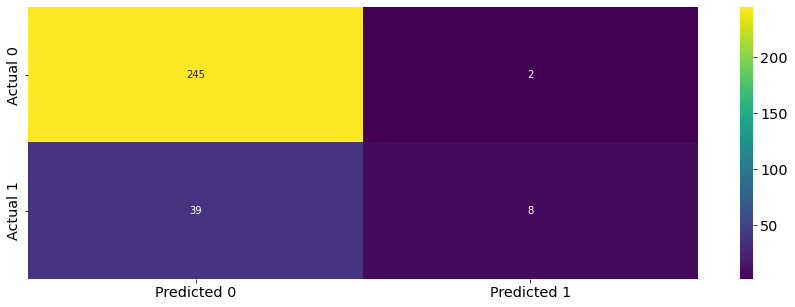

In [ ]:
plotConfusionMatrix(y_test, y_pred)

##### Mean Absolute Error (MAE):

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.13945578231292516

##### Mean square error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
print("MSE: ",MSE)

MSE:  0.13945578231292516


##### Root Mean Square Error (RMSE)


In [ ]:
RSME = mean_squared_error(y_test, y_pred, squared=False)
print("RSME: ",RSME)

RSME:  0.3734377890799553


##### R2

In [ ]:
R2 = gradientBoosting.score(x_test, y_test)
print("R2: ",R2)

R2:  0.8605442176870748


### 6.2 Ridge Regression

#### 6.2.0 Training and predicting

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
modelRidge = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

In [ ]:
modelRidge.fit(x_train_copy, y_train_copy)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [ ]:
print(modelRidge.alpha_)

0.99


In [ ]:
modelRidge.score(x_train_copy, y_train_copy)

0.1501883663909147

In [ ]:
y_train_pred = modelRidge.predict(x_train_copy)
y_pred = modelRidge.predict(x_test_copy)

In [ ]:
print(f'R² = {modelRidge.score(x_train_copy, y_train_copy)}')
print(f'R² = {modelRidge.score(x_test_copy, y_pred)}')

R² = 0.1501883663909147
R² = 1.0


https://medium.com/machina-sapiens/o-algoritmo-da-floresta-aleat%C3%B3ria-3545f6babdf8

#### 6.1.1 Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score
print("Train score: ",roc_auc_score(y_train, y_train_pred))
print("Test score: ",roc_auc_score(y_train, y_train_pred))

Train score:  0.7706282694566029
Test score:  0.7706282694566029


##### Coeficients

In [ ]:
modelRidge.intercept_

-0.014202772894463256

In [ ]:
coefficients = modelRidge.coef_

In [ ]:
modelRidge.coef_

array([0.19778619, 0.16545355, 0.10664341, 0.03608225])

##### Mean Absolute Error (MAE):

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.2424052100008132

##### Mean square error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
print("MSE: ",MSE)

MSE:  0.12274741883198736


##### Root Mean Square Error (RMSE)


In [ ]:
RSME = mean_squared_error(y_test, y_pred, squared=False)
print("RSME: ",RSME)

RSME:  0.3503532771817432


##### R2

In [ ]:
R2 = modelRidge.score(x_test, y_test)
print("R2: ",R2)

R2:  0.08607150536982866


# Bibliography:
HOLTOM, Brooks; ALLEN, David. Better Ways to Predict Who’s Going to Quit. Harvard Business Review, 16 ago. 2019. Disponível em: <https://hbr.org/2019/08/better-ways-to-predict-whos-going-to-quit?ab=hero-subleft-1>. Acesso em: 2 set. 2022. <br/>
GÉRON, Aurélien. Mãos à Obra: Aprendizado de Máquina com Scikit-Learn & TensorFlow. Alta Books, 2019.<br/>
ZACH. Ridge Regression in Python (Step-by-Step). Statology, 12 nov. 2020. <https://www.statology.org/ridge-regression-in-python/>. Acesso em: 10 set. 2022.